In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [166]:
data=pd.read_csv('delivery_time.csv')

In [167]:
data.shape

(21, 2)

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [169]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [170]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


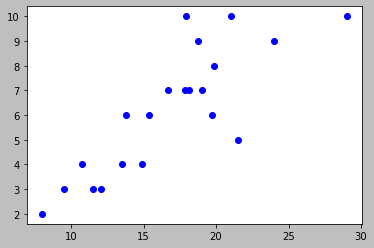

In [171]:
plt.plot(data['Delivery Time'],data['Sorting Time'],'bo')

In [172]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

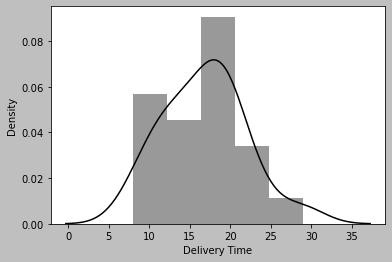

In [173]:
sns.distplot(data['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

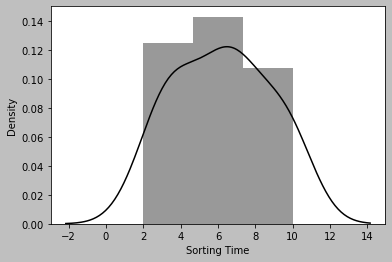

In [174]:
sns.distplot(data['Sorting Time'])

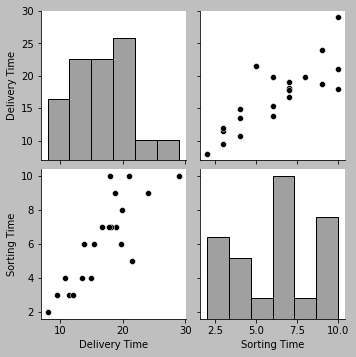

In [175]:
sns.pairplot(data)

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

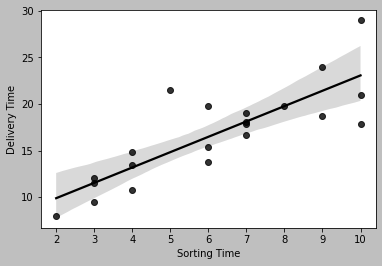

In [176]:
sns.regplot(x='Sorting Time', y='Delivery Time',data=data)

In [177]:
#1. linear model

In [178]:
data=data.rename(columns={"Delivery Time":"deliverytime","Sorting Time":"sortingtime"})

In [179]:
data.head()

,deliverytime,sortingtime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [180]:
import statsmodels.formula.api as smf
model1=smf.ols('deliverytime~sortingtime',data=data).fit()

In [181]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliverytime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 05 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        15:19:18   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
sortingtime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
pred1=model1.predict(data.sortingtime)
pred1.head()

0    23.072933
1    13.178814
2    16.476853
3    21.423913
4    23.072933
dtype: float64

In [183]:
model1.resid.head()

0   -2.072933
1    0.321186
2    3.273147
3    2.576087
4    5.927067
dtype: float64

In [184]:
rmse_lin=np.sqrt(np.mean((np.array(data["deliverytime"])-np.array(pred1))**2))
rmse_lin

2.7916503270617654

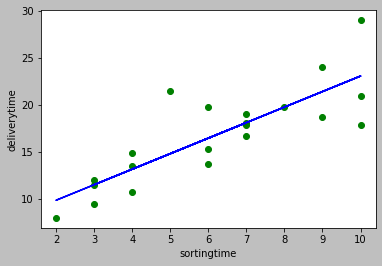

In [185]:
plt.scatter(x=data["sortingtime"],y=data["deliverytime"],color="green")
plt.plot(data["sortingtime"],pred1,color="blue")
plt.xlabel("sortingtime")
plt.ylabel("deliverytime")
plt.show()

In [186]:
#2. Log Transformation

In [187]:
model2 = smf.ols("deliverytime~np.log(sortingtime)",data=data).fit()

In [188]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliverytime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 05 Jan 2023   Prob (F-statistic):           2.64e-06
Time:                        15:19:18   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sortingtime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [189]:
pred2=model2.predict(data.sortingtime)
pred2.head()

0    21.982913
1    13.696517
2    17.363305
3    21.030094
4    21.982913
dtype: float64

In [190]:
rmse_log=np.sqrt(np.mean((np.array(data["deliverytime"])-np.array(pred2))**2))

In [191]:
rmse_log

2.733171476682066

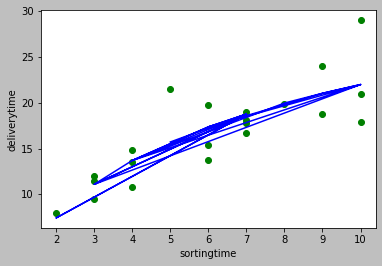

In [192]:
plt.scatter(x=data["sortingtime"],y=data["deliverytime"],color="green")
plt.plot(data["sortingtime"],pred2,color="blue")
plt.xlabel("sortingtime")
plt.ylabel("deliverytime")
plt.show()

In [193]:
# 3. Exponential Transformation

In [194]:
model3=smf.ols("np.log(deliverytime)~sortingtime",data=data).fit()

In [195]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(deliverytime)   R-squared:                       0.711
Model:                              OLS   Adj. R-squared:                  0.696
Method:                   Least Squares   F-statistic:                     46.73
Date:                  Thu, 05 Jan 2023   Prob (F-statistic):           1.59e-06
Time:                          15:19:18   Log-Likelihood:                 7.7920
No. Observations:                    21   AIC:                            -11.58
Df Residuals:                        19   BIC:                            -9.495
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
sortingtime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [196]:
pred3a=model3.predict(data.sortingtime)

In [197]:
pred3=np.exp(pred3a)

In [198]:
pred3.head()

0    23.972032
1    12.725123
2    15.716034
3    21.570707
4    23.972032
dtype: float64

In [199]:
rmse_exp=np.sqrt(np.mean((np.array(data["deliverytime"])-np.array(pred3))**2))

In [200]:
rmse_exp

2.940250323056201

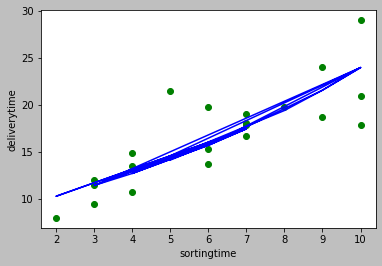

In [201]:
plt.scatter(x=data["sortingtime"],y=data["deliverytime"],color="green")
plt.plot(data["sortingtime"],pred3,color="blue")
plt.xlabel("sortingtime")
plt.ylabel("deliverytime")
plt.show()

In [202]:
# 4. Quadratic Model

In [203]:
data["sortingtime_sq"] = data["sortingtime"]*data["sortingtime"]

In [204]:
model4 = smf.ols("np.log(deliverytime)~sortingtime+sortingtime_sq",data=data).fit()

In [205]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(deliverytime)   R-squared:                       0.765
Model:                              OLS   Adj. R-squared:                  0.739
Method:                   Least Squares   F-statistic:                     29.28
Date:                  Thu, 05 Jan 2023   Prob (F-statistic):           2.20e-06
Time:                          15:19:18   Log-Likelihood:                 9.9597
No. Observations:                    21   AIC:                            -13.92
Df Residuals:                        18   BIC:                            -10.79
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.6997      0.228      7.441      0.000       1.220       2.180
sortingtime        0.2659      0.080      3.315      0.004       0.097       0.434
sortingtime_sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [206]:
pred4a= model4.predict(data)

In [207]:
pred4a.head()

0    3.074863
1    2.557942
2    2.832974
3    3.052913
4    3.074863
dtype: float64

In [208]:
pred4=np.exp(pred4a)

In [209]:
pred4

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [210]:
rmse_quad = np.sqrt(np.mean((np.array(data["deliverytime"])-np.array(pred4))**2))

In [211]:
rmse_quad

2.799041988740925

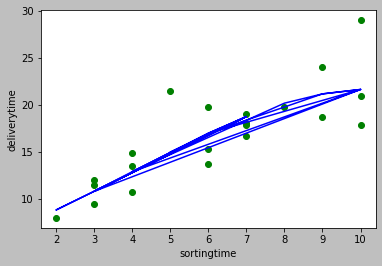

In [212]:
plt.scatter(x=data["sortingtime"],y=data["deliverytime"],color="green")
plt.plot(data["sortingtime"],pred4,color="blue")
plt.xlabel("sortingtime")
plt.ylabel("deliverytime")
plt.show()

In [213]:
data1 = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
         "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
         "Rsquare":pd.Series([model1.rsquared,model2.rsquared,model3.rsquared,model4.rsquared])}
table=pd.DataFrame(data1)
table

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,2.791650,0.682271
1,rmse_log,2.733171,0.695443
2,rmse_exp,2.940250,0.710948
3,rmse_quad,2.799042,0.764867


In [214]:
plt.style.use('grayscale')

In [215]:
# Model Validation by plotting the errors

Text(0, 0.5, 'Standarized Residual')

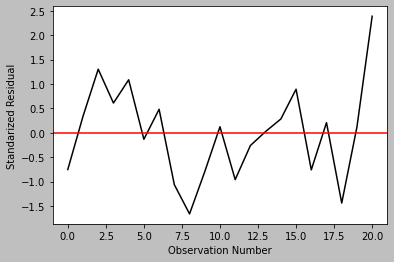

In [216]:
plt.plot(np.arange(21),model3.resid_pearson)
plt.axhline(y=0,color="red")
plt.xlabel("Observation Number")
plt.ylabel("Standarized Residual")

Text(0, 0.5, 'Standarized Residual')

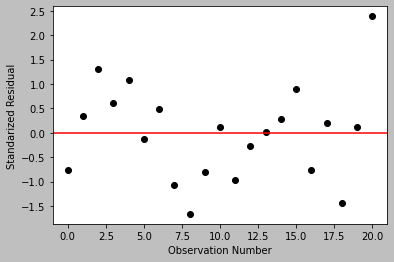

In [217]:
plt.scatter(np.arange(21),model3.resid_pearson)
plt.axhline(y=0,color="red")
plt.xlabel("Observation Number")
plt.ylabel("Standarized Residual")

# WE CAN USE THE QUADRATIC MODEL AS IT HAS THE LEAST RMSC VALE AND 76.4% ACCURACY